In [8]:
# IMPORTS

import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import linspace
import scipy.integrate as integrate

In [23]:
# FUNÇÕES


#Calculando a distribuição Hypoexponencial - CDF  
    
def DistHypoCDF(lamb1 , lamb2, t):
    
    PrimeiroTermo = 1 - (lamb2/(lamb2-lamb1))*math.e**(-lamb1*t)
    SegundoTermo = lamb1/(lamb2-lamb1)*math.e**(-lamb2*t)
    DistHypoCDFR = PrimeiroTermo*SegundoTermo
    
    return DistHypoCDFR

#Calculando a distribuição Hypoexponencial - MTTF"

def MTTF(sistema) :
    
    M = np.mean(sistema)
    return M      
    

#Calculando a Redundância TMR/5MR

def MR(lamb, taxaFalha1, taxaFalha2 , disp, space):
    
    r = 1 - ((1 - R(taxaFalha1 * lamb, taxaFalha2 * lamb,space)) ** disp)
    return r

# Calculando a função F(t) da distribuição Hypoexponencial 

def F(lamb2,lamb1,t):
    
    f = 1 - ((lamb2/(lamb2-lamb1)) * (math.e ** (-lamb1 * t))) + ((lamb1/(lamb2 - lamb1)) * (math.e ** (-lamb2 * t)))
    
    return f

#Calculando a função R(t) da distribuição Hypoexponencial 
    
def R(lamb2 , lamb1,t):
    
    r = 1 - F(lamb2,lamb1,t)
    
    return r

# Plotando os gráficos a partir das informações desejadas

def plot(lamb, taxaFalha1, taxaFalha2):
    
    space = linspace(0,1.5)

    sistema_2_dispositivos = MR(lamb, taxaFalha1, taxaFalha2, 2, space)
    sistema_3_dispositivos = MR(lamb, taxaFalha1, taxaFalha2, 3, space)
    sistema_4_dispositivos = MR(lamb, taxaFalha1, taxaFalha2, 4, space)
    
    
    titulo = r'$\lambda = $' + str(lamb)   
    plt.title(titulo)
    
    plt.plot(space, sistema_2_dispositivos, label = '3 dispositivos')
    plt.plot(space, sistema_3_dispositivos, label = '3 dispositivos')
    plt.plot(space, sistema_4_dispositivos, label = '4 dispositivos')
    
    plt.ylabel('Reliability(t)')
    plt.xlabel('Time(t)')
    plt.legend(loc='upper right')
    
    plt.axvline(MTTF(sistema_2_dispositivos), c = 'blue')
    plt.axvline(MTTF(sistema_3_dispositivos), c =  'orange')
    plt.axvline(MTTF(sistema_4_dispositivos), c =  'green')
    
    plt.show()
    

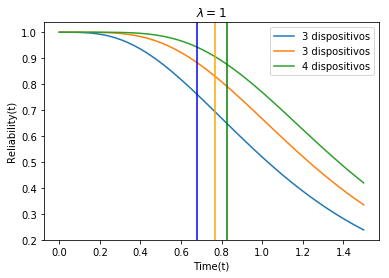

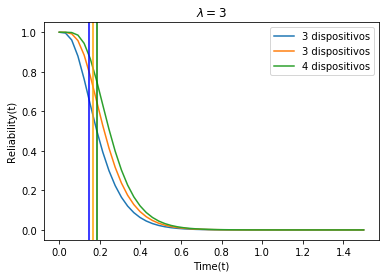

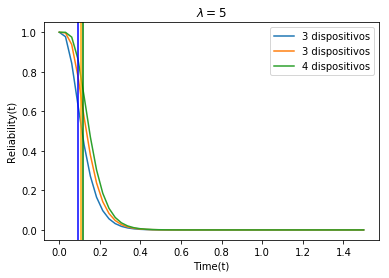

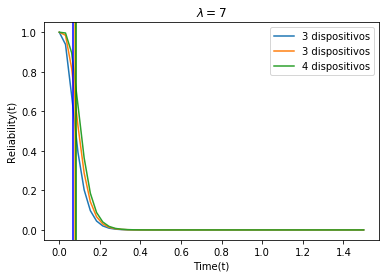

In [24]:
plot(1,3,2)

plot(3,5,4)

plot(5,5,4)

plot(7,5,4)